In [7]:
import os
import pandas as pd

modality = {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'}
vocal_channel = {'01': 'speech', '02': 'song'}
emotion = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}
intensity = {'01': 'normal', '02': 'strong'}
statement = {'01': 'Kids are talking by the door', '02': 'Dogs are sitting by the door'}
repetition = {'01': '1st repetition', '02': '2nd repetition'}

data = []

base_path = "../Dataset"  

for actor_folder in os.listdir(base_path):
    actor_path = os.path.join(base_path, actor_folder)
    if not os.path.isdir(actor_path):
        continue
    
    for filename in os.listdir(actor_path):
        if not filename.lower().endswith('.wav'):
            continue
        
        parts = filename.split('.')[0].split('-')
        if len(parts) != 7:
            continue
        
        file_info = {
            'Filename': filename,
            'Modality': modality.get(parts[0]),
            'Vocal Channel': vocal_channel.get(parts[1]),
            'Emotion': emotion.get(parts[2]),
            'Intensity': intensity.get(parts[3]),
            'Statement': statement.get(parts[4]),
            'Repetition': repetition.get(parts[5]),
            'Actor': int(parts[6]),
            'Gender': 'male' if int(parts[6]) % 2 == 1 else 'female'
        }
        data.append(file_info)

df = pd.DataFrame(data)
df.head()

,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition,Actor,Gender
0,03-02-01-01-01-01-01.wav,audio-only,song,neutral,normal,Kids are talking by the door,1st repetition,1,male
1,03-02-01-01-01-02-01.wav,audio-only,song,neutral,normal,Kids are talking by the door,2nd repetition,1,male
2,03-02-01-01-02-01-01.wav,audio-only,song,neutral,normal,Dogs are sitting by the door,1st repetition,1,male
3,03-02-01-01-02-02-01.wav,audio-only,song,neutral,normal,Dogs are sitting by the door,2nd repetition,1,male
4,03-02-02-01-01-01-01.wav,audio-only,song,calm,normal,Kids are talking by the door,1st repetition,1,male


# EDA

In [13]:
df.isnull().sum()

Filename            0
Modality            0
Vocal Channel       0
Emotion             0
Intensity           0
Statement           0
Repetition          0
Actor               0
Gender              0
emotion_label    1012
dtype: int64

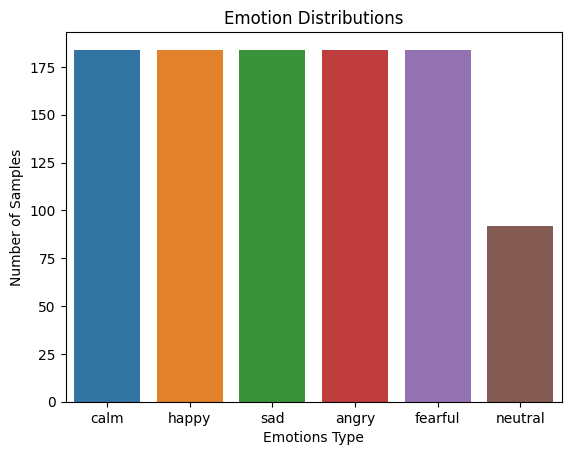

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.Figure(figsize=(10,5))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index)
plt.title('Emotion Distributions')
plt.xlabel('Emotions Type')
plt.ylabel('Number of Samples')
plt.show()

In [14]:
emotions_count = df['Emotion'].value_counts(normalize=True) * 100

print(emotions_count.round(2))

Emotion
calm       18.18
happy      18.18
sad        18.18
angry      18.18
fearful    18.18
neutral     9.09
Name: proportion, dtype: float64


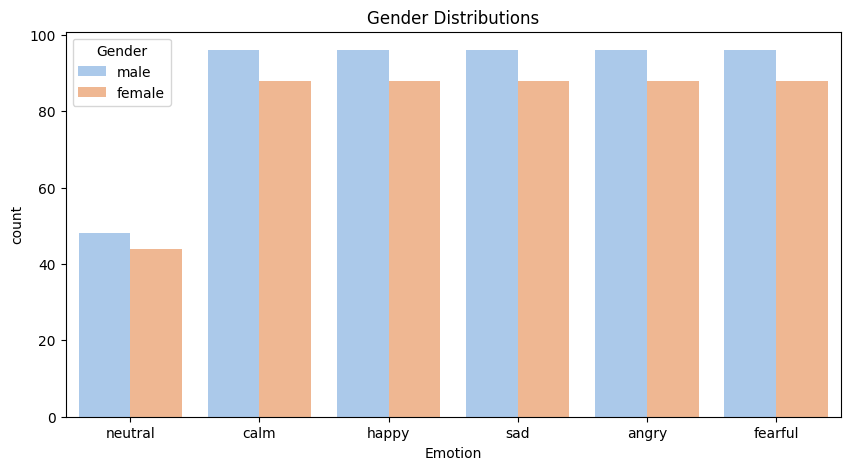

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', hue='Gender' ,data=df, palette='pastel')
plt.title('Gender Distributions')
plt.show()

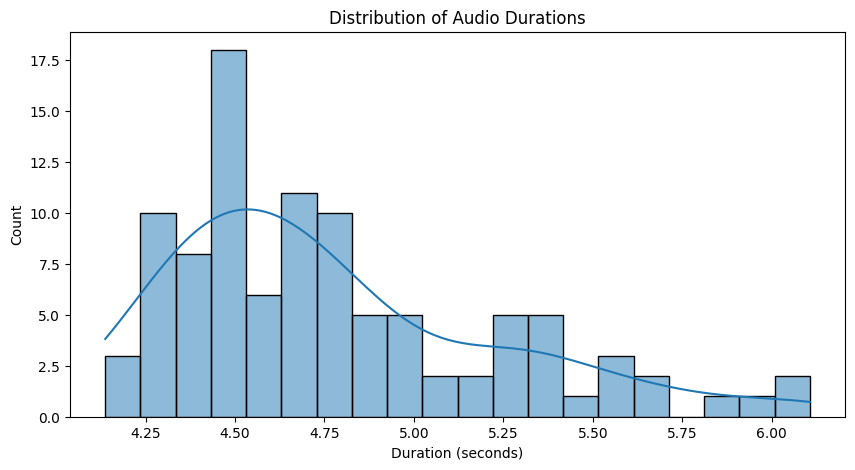

In [18]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

durations = []
df['Actor'] = df['Actor'].astype(int)

for _, row in df.iloc[:100].iterrows():
  actor_num = int(row['Actor'])
  filename = row['Filename']
  actor_folder = f"Actor_{actor_num:02d}"
  file_path = os.path.join(base_path, actor_folder, filename)
  
  if not os.path.isfile(file_path):
    print("File not found, skip:", file_path)
    continue
  
  try:
    y, sr = librosa.load(file_path, sr=None)  
    dur = librosa.get_duration(y=y, sr=sr)
    durations.append(dur)
  except Exception as e:
    print("Error loading", file_path, "-", str(e))
    continue

plt.figure(figsize=(10,5))
sns.histplot(durations, bins=20, kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()
